In [1]:
%load_ext autoreload
%autoreload 2

from lcg_plus.optimizer import GBS_optimizer
from lcg_plus.cost_functions import symm_effective_squeezing_gradients, symm_effective_squeezing, state_prep_GBS, gkp_squeezing, gkp_squeezing_gradients
from lcg_plus.plotting import plot_wigner_marginals
from lcg_plus.effective_sqz import effective_sqz
import numpy as np
import matplotlib.pyplot as plt
from copy import copy, deepcopy
import seaborn as sns


## Verifying gradients of effective squeezing with parameter shift

1.12572995680962 [ 1.02644375  0.4153731  -1.0137155   1.29019314  0.36832288  0.98720874]


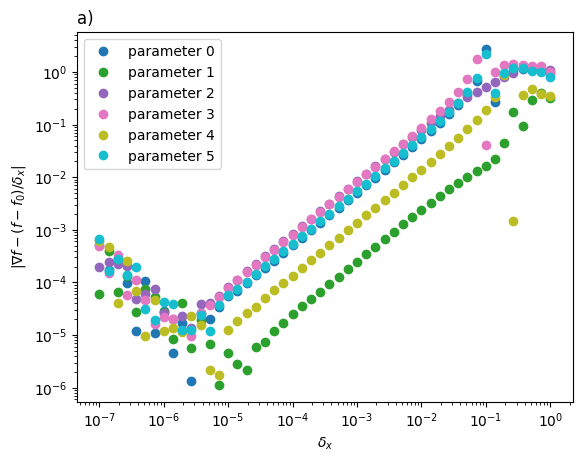

In [5]:
opt = GBS_optimizer(3,
                    pattern = [5,5], 
                    inf = 1e-4, 
                    bs_arrange='Clements', 
                    gradients = True, etas = np.array([0.9,0.7,1]),
                    costf = symm_effective_squeezing_gradients)

#90
np.random.seed(120)
opt.set_initial_guess()

cmap = sns.color_palette('tab10',as_cmap =True)
c = cmap(np.linspace(0, 1, opt.num_params))

eff0, grad0 = opt.init_costf

print(eff0, grad0)
params_init = opt.guess

deltas = 10**np.linspace(-7,0)

for i in range(len(grad0)):
    diffs = np.zeros(len(deltas))
    for j, dx in enumerate(deltas): 
        params_new = deepcopy(params_init)
        #Perturb each parameter slightly
        params_new[i] += dx
        
        eff, grad = symm_effective_squeezing_gradients(params_new, *opt.costf_args)
        diffs[j] = np.abs(grad0[i]-(eff-eff0)/dx)
        
    plt.plot(deltas, diffs, color = c[i], label =  f'parameter {i}', linestyle = '', marker= 'o')
    

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$|\nabla f - (f-f_0)/\delta_x|$')
plt.xlabel(r'$\delta_x$')
plt.legend()
plt.title('a)', loc = 'left')
plt.show()

## Verifying gradients of gkp squeezing with parameter shift

2.25956455885121 [ 0.16724333  0.00226724  0.0875731  -0.16236753  0.2438789  -0.0548552 ]


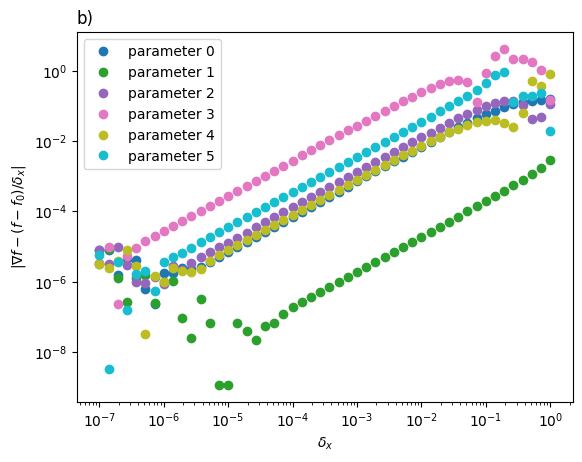

In [11]:
opt = GBS_optimizer(3,
                    pattern = [5,5], 
                    inf = 1e-4, 
                    bs_arrange='Clements', 
                    gradients = True,
                    costf_lattice = 's0',
                    costf = gkp_squeezing_gradients)


np.random.seed(10)
opt.set_initial_guess()

cmap = sns.color_palette('tab10',as_cmap =True)
c = cmap(np.linspace(0, 1, opt.num_params))

eff0, grad0 = opt.init_costf

print(eff0, grad0)
params_init = opt.guess

deltas = 10**np.linspace(-7,0)

for i in range(len(grad0)):
    diffs = np.zeros(len(deltas))
    for j, dx in enumerate(deltas): 
        params_new = deepcopy(params_init)
        #Perturb each parameter slightly
        params_new[i] += dx
        
        eff, grad = gkp_squeezing_gradients(params_new, *opt.costf_args)
        diffs[j] = np.abs(grad0[i]-(eff-eff0)/dx)
        
    plt.plot(deltas, diffs, color = c[i], label =  f'parameter {i}', linestyle = '', marker= 'o')
    

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$|\nabla f - (f-f_0)/\delta_x|$')
plt.xlabel(r'$\delta_x$')
plt.legend()
plt.title('b)', loc = 'left')
plt.show()